In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression



In [2]:
# Load dataset
athletes = pd.read_csv('D:/Olympic Dataset/athlete_events.csv')
regions = pd.read_csv('D:/Olympic Dataset/noc_regions.csv')


In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [30]:
#Join the dataframes
athletes_df = athletes.merge(regions,how = 'left', on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [31]:
#column names consistent
athletes_df.rename(columns = { 'region' : 'Region', 'notes' : 'Notes'}, inplace = True);
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [32]:
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [33]:
athletes_df.duplicated().sum()

1385

In [34]:
athletes_df.drop_duplicates(inplace = True)

In [35]:
athletes_df.duplicated().sum()

0

In [36]:
athletes_df = pd.concat([athletes_df,pd.get_dummies(athletes_df['Medal'])],axis = 1)

In [43]:
athletes_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()


,Year,Gold,Silver,Bronze
0,2008,671,667,710
1,2016,665,655,703
2,2004,664,660,677
3,2000,663,661,680
4,1992,663,657,710
5,2012,632,630,679
6,1996,608,605,629
7,1988,607,601,637
8,1984,571,551,576
9,1980,529,531,542


In [44]:
Medal_tally = athletes_df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [53]:
Medal_tally = Medal_tally.groupby('Year').sum()[['Gold','Silver','Bronze']]

Medal_tally = Medal_tally.sort_values(['Year','Gold'], ascending=[True,False])

In [54]:
# Use .loc to explicitly set values in the original DataFrame
Medal_tally.loc[:, 'Total'] = Medal_tally['Gold'] + Medal_tally['Silver'] + Medal_tally['Bronze']

In [55]:
Medal_tally

,Gold,Silver,Bronze,Total
Year,,,,
1896,44,41,35,120
1900,102,99,99,300
1904,97,93,90,280
1906,74,77,73,224
1908,109,107,106,322
1912,108,104,104,316
1920,158,152,139,449
1924,149,147,148,444
1928,133,130,134,397


In [49]:
# Define X and y
X = Medal_tally['Year'].values.reshape(-1,1) 
y = Medal_tally['Total'].values

In [50]:
# Create and fit model
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [58]:
# Predict using model
X_new = [[2020]] 
y_pred = model.predict(X_new) 

In [59]:
# Print predictions
print("Predicted Total Medals in 2020:", y_pred[0]) 

Predicted Total Medals in 202: 737.0896526830475


In [60]:
# Evaluate model
r_sq = model.score(X, y)
print("Coefficient of determination:", r_sq)

Coefficient of determination: 0.2558713837140234


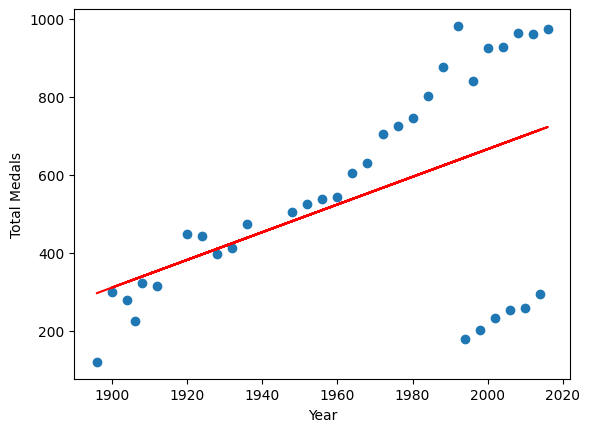

In [61]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

y_pred = model.predict(X)
plt.plot(X, y_pred, color='red')

plt.xlabel('Year')
plt.ylabel('Total Medals')

plt.show()